In [1]:
#import library yang relevan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("bank.csv", sep=";")
df.shape

(4521, 17)

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [5]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [6]:
def replace_marital(val):
    if val == "single":
        return 0
    else:
        return 1

df["marital"] = df["marital"].apply(replace_marital, 1)

In [7]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,1,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,1,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,0,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,1,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,1,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [8]:
df["housing"] = df["housing"].map({
    "no": 0,
    "yes": 1
}.get)

In [9]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,1,primary,no,1787,0,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,1,secondary,no,4789,1,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,0,tertiary,no,1350,1,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,1,tertiary,no,1476,1,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,1,secondary,no,0,1,no,unknown,5,may,226,1,-1,0,unknown,no


In [10]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,services,1,secondary,no,-333,1,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,1,tertiary,yes,-3313,1,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,1,secondary,no,295,0,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,1,secondary,no,1137,0,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,0,tertiary,no,1136,1,yes,cellular,3,apr,345,2,249,7,other,no


In [11]:
df['loan'] = df["loan"].replace({
    "no": 0,
    "yes": 1
})
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,1,primary,no,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,1,secondary,no,4789,1,1,cellular,11,may,220,1,339,4,failure,no
2,35,management,0,tertiary,no,1350,1,0,cellular,16,apr,185,1,330,1,failure,no
3,30,management,1,tertiary,no,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,1,secondary,no,0,1,0,unknown,5,may,226,1,-1,0,unknown,no


In [12]:
df["education"].unique()

array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object)

In [13]:
df["job"].unique()

array(['unemployed', 'services', 'management', 'blue-collar',
       'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
       'housemaid', 'retired', 'unknown'], dtype=object)

In [14]:
df["job"].replace({
    "unknown": np.nan,
    "management": 0,
    "technician": 1,
    "entrepreneur": 2,
    "blue-collar": 3,
    "retired": 4,
    "admin.": 5,
    "services": 6,
    "self-employed": 7,
    "unemployed": 8,
    "housemaid": 9,
    "student": 10
}, inplace=True)

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,8.0,1,primary,no,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,no
1,33,6.0,1,secondary,no,4789,1,1,cellular,11,may,220,1,339,4,failure,no
2,35,0.0,0,tertiary,no,1350,1,0,cellular,16,apr,185,1,330,1,failure,no
3,30,0.0,1,tertiary,no,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,no
4,59,3.0,1,secondary,no,0,1,0,unknown,5,may,226,1,-1,0,unknown,no


In [15]:
nan_rows = df[df['job'].isnull()]
print("Data NULL pada atribut job : " + str(nan_rows.shape[0]))
nan_rows

Data NULL pada atribut job : 38


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
95,41,NaN,0,tertiary,no,1567,0,0,cellular,1,jul,291,2,-1,0,unknown,no
178,37,NaN,1,unknown,no,1699,0,0,unknown,9,jun,63,1,-1,0,unknown,no
230,52,NaN,1,secondary,no,142,0,0,cellular,25,aug,112,6,-1,0,unknown,no
641,56,NaN,1,unknown,no,0,0,0,unknown,20,jun,471,2,-1,0,unknown,no
779,55,NaN,1,primary,no,159,0,0,unknown,4,sep,15,1,-1,0,unknown,no
1076,54,NaN,1,secondary,no,2206,0,0,cellular,12,nov,104,1,99,2,other,yes
1218,54,NaN,1,unknown,no,2508,0,0,unknown,20,jun,34,8,-1,0,unknown,no
1266,54,NaN,1,unknown,no,895,0,0,cellular,7,oct,335,1,-1,0,unknown,yes
1432,35,NaN,1,primary,no,365,0,0,cellular,29,aug,41,2,-1,0,unknown,no
1441,49,NaN,1,unknown,no,301,0,0,cellular,14,aug,789,2,-1,0,unknown,no


In [16]:
df["education"].replace({
    "unknown": np.nan,
    "tertiary": 0,
    "secondary": 1,
    "primary": 2
}, inplace=True)

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,8.0,1,2.0,no,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,no
1,33,6.0,1,1.0,no,4789,1,1,cellular,11,may,220,1,339,4,failure,no
2,35,0.0,0,0.0,no,1350,1,0,cellular,16,apr,185,1,330,1,failure,no
3,30,0.0,1,0.0,no,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,no
4,59,3.0,1,1.0,no,0,1,0,unknown,5,may,226,1,-1,0,unknown,no


In [17]:
df["default"].replace({
    "no": 0,
    "yes": 1
}, inplace=True)

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,8.0,1,2.0,0,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,no
1,33,6.0,1,1.0,0,4789,1,1,cellular,11,may,220,1,339,4,failure,no
2,35,0.0,0,0.0,0,1350,1,0,cellular,16,apr,185,1,330,1,failure,no
3,30,0.0,1,0.0,0,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,no
4,59,3.0,1,1.0,0,0,1,0,unknown,5,may,226,1,-1,0,unknown,no


In [18]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,6.0,1,1.0,0,-333,1,0,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,7.0,1,0.0,1,-3313,1,1,unknown,9,may,153,1,-1,0,unknown,no
4518,57,1.0,1,1.0,0,295,0,0,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,3.0,1,1.0,0,1137,0,0,cellular,6,feb,129,4,211,3,other,no
4520,44,2.0,0,0.0,0,1136,1,1,cellular,3,apr,345,2,249,7,other,no


In [19]:
df["balance"].describe()

count     4521.000000
mean      1422.657819
std       3009.638142
min      -3313.000000
25%         69.000000
50%        444.000000
75%       1480.000000
max      71188.000000
Name: balance, dtype: float64

In [20]:
#Normalization and Standardizatio data
#liat situs ini http://www.dataminingblog.com/standardization-vs-normalization/

### Normalization
<img src="Normalization.png">

### Standardization
<img src="Standardization.png">

In [21]:
#kita gunakan normalization
df["balance"] = df["balance"].apply(lambda v: (v - df["balance"].min()) / (df["balance"].max() - df["balance"].min()))

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,8.0,1,2.0,0,0.068455,0,0,cellular,19,oct,79,1,-1,0,unknown,no
1,33,6.0,1,1.0,0,0.108750,1,1,cellular,11,may,220,1,339,4,failure,no
2,35,0.0,0,0.0,0,0.062590,1,0,cellular,16,apr,185,1,330,1,failure,no
3,30,0.0,1,0.0,0,0.064281,1,1,unknown,3,jun,199,4,-1,0,unknown,no
4,59,3.0,1,1.0,0,0.044469,1,0,unknown,5,may,226,1,-1,0,unknown,no


In [22]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,6.0,1,1.0,0,0.039999,1,0,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,7.0,1,0.0,1,0.000000,1,1,unknown,9,may,153,1,-1,0,unknown,no
4518,57,1.0,1,1.0,0,0.048429,0,0,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,3.0,1,1.0,0,0.059731,0,0,cellular,6,feb,129,4,211,3,other,no
4520,44,2.0,0,0.0,0,0.059717,1,1,cellular,3,apr,345,2,249,7,other,no


In [23]:
df["contact"].replace({
    "unknown": np.nan,
    "telephone": 0,
    "cellular": 1
}, inplace=True)

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,8.0,1,2.0,0,0.068455,0,0,1.0,19,oct,79,1,-1,0,unknown,no
1,33,6.0,1,1.0,0,0.108750,1,1,1.0,11,may,220,1,339,4,failure,no
2,35,0.0,0,0.0,0,0.062590,1,0,1.0,16,apr,185,1,330,1,failure,no
3,30,0.0,1,0.0,0,0.064281,1,1,NaN,3,jun,199,4,-1,0,unknown,no
4,59,3.0,1,1.0,0,0.044469,1,0,NaN,5,may,226,1,-1,0,unknown,no


In [24]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,6.0,1,1.0,0,0.039999,1,0,1.0,30,jul,329,5,-1,0,unknown,no
4517,57,7.0,1,0.0,1,0.000000,1,1,NaN,9,may,153,1,-1,0,unknown,no
4518,57,1.0,1,1.0,0,0.048429,0,0,1.0,19,aug,151,11,-1,0,unknown,no
4519,28,3.0,1,1.0,0,0.059731,0,0,1.0,6,feb,129,4,211,3,other,no
4520,44,2.0,0,0.0,0,0.059717,1,1,1.0,3,apr,345,2,249,7,other,no


In [25]:
df.contact.unique()

array([ 1., nan,  0.])

In [26]:
df.month.unique()

array(['oct', 'may', 'apr', 'jun', 'feb', 'aug', 'jan', 'jul', 'nov',
       'sep', 'mar', 'dec'], dtype=object)

In [27]:
df.month = df.month.map({
    'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6, 'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec':12
})

In [28]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,8.0,1,2.0,0,0.068455,0,0,1.0,19,10,79,1,-1,0,unknown,no
1,33,6.0,1,1.0,0,0.108750,1,1,1.0,11,5,220,1,339,4,failure,no
2,35,0.0,0,0.0,0,0.062590,1,0,1.0,16,4,185,1,330,1,failure,no
3,30,0.0,1,0.0,0,0.064281,1,1,NaN,3,6,199,4,-1,0,unknown,no
4,59,3.0,1,1.0,0,0.044469,1,0,NaN,5,5,226,1,-1,0,unknown,no


In [29]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,6.0,1,1.0,0,0.039999,1,0,1.0,30,7,329,5,-1,0,unknown,no
4517,57,7.0,1,0.0,1,0.000000,1,1,NaN,9,5,153,1,-1,0,unknown,no
4518,57,1.0,1,1.0,0,0.048429,0,0,1.0,19,8,151,11,-1,0,unknown,no
4519,28,3.0,1,1.0,0,0.059731,0,0,1.0,6,2,129,4,211,3,other,no
4520,44,2.0,0,0.0,0,0.059717,1,1,1.0,3,4,345,2,249,7,other,no


In [30]:
df.poutcome.unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [31]:
df.poutcome = df.poutcome.map({
    'unknown': np.nan, 
    'failure':0, 
    'other':1, 
    'success':2, 
})

In [32]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,8.0,1,2.0,0,0.068455,0,0,1.0,19,10,79,1,-1,0,NaN,no
1,33,6.0,1,1.0,0,0.108750,1,1,1.0,11,5,220,1,339,4,0.0,no
2,35,0.0,0,0.0,0,0.062590,1,0,1.0,16,4,185,1,330,1,0.0,no
3,30,0.0,1,0.0,0,0.064281,1,1,NaN,3,6,199,4,-1,0,NaN,no
4,59,3.0,1,1.0,0,0.044469,1,0,NaN,5,5,226,1,-1,0,NaN,no


In [33]:
#normalization pada pdays
df.pdays = df.pdays.apply(lambda v: (v - df.pdays.min()) / (df.pdays.max() - df.pdays.min()))

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,8.0,1,2.0,0,0.068455,0,0,1.0,19,10,79,1,0.000000,0,NaN,no
1,33,6.0,1,1.0,0,0.108750,1,1,1.0,11,5,220,1,0.389908,4,0.0,no
2,35,0.0,0,0.0,0,0.062590,1,0,1.0,16,4,185,1,0.379587,1,0.0,no
3,30,0.0,1,0.0,0,0.064281,1,1,NaN,3,6,199,4,0.000000,0,NaN,no
4,59,3.0,1,1.0,0,0.044469,1,0,NaN,5,5,226,1,0.000000,0,NaN,no


In [34]:
df.y.replace({
    "no":0,
    "yes":1
}, inplace=True)

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,8.0,1,2.0,0,0.068455,0,0,1.0,19,10,79,1,0.000000,0,NaN,0
1,33,6.0,1,1.0,0,0.108750,1,1,1.0,11,5,220,1,0.389908,4,0.0,0
2,35,0.0,0,0.0,0,0.062590,1,0,1.0,16,4,185,1,0.379587,1,0.0,0
3,30,0.0,1,0.0,0,0.064281,1,1,NaN,3,6,199,4,0.000000,0,NaN,0
4,59,3.0,1,1.0,0,0.044469,1,0,NaN,5,5,226,1,0.000000,0,NaN,0


In [35]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,6.0,1,1.0,0,0.039999,1,0,1.0,30,7,329,5,0.000000,0,NaN,0
4517,57,7.0,1,0.0,1,0.000000,1,1,NaN,9,5,153,1,0.000000,0,NaN,0
4518,57,1.0,1,1.0,0,0.048429,0,0,1.0,19,8,151,11,0.000000,0,NaN,0
4519,28,3.0,1,1.0,0,0.059731,0,0,1.0,6,2,129,4,0.243119,3,1.0,0
4520,44,2.0,0,0.0,0,0.059717,1,1,1.0,3,4,345,2,0.286697,7,1.0,0


In [36]:
df.y.unique()

array([0, 1], dtype=int64)

In [37]:
#normalization on duration
df.duration = df.duration.apply(lambda v: ((v-df.duration.min()) / (df.duration.max() - df.duration.min())))
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,8.0,1,2.0,0,0.068455,0,0,1.0,19,10,0.024826,1,0.000000,0,NaN,0
1,33,6.0,1,1.0,0,0.108750,1,1,1.0,11,5,0.071500,1,0.389908,4,0.0,0
2,35,0.0,0,0.0,0,0.062590,1,0,1.0,16,4,0.059914,1,0.379587,1,0.0,0
3,30,0.0,1,0.0,0,0.064281,1,1,NaN,3,6,0.064548,4,0.000000,0,NaN,0
4,59,3.0,1,1.0,0,0.044469,1,0,NaN,5,5,0.073486,1,0.000000,0,NaN,0


In [38]:
df.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,4521.000000,4483.000000,4521.000000,4334.000000,4521.000000,4521.000000,4521.000000,4521.000000,3197.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,816.000000,4521.000000
mean,41.170095,3.102164,0.735457,0.844947,0.016810,0.063565,0.566025,0.152842,0.905849,15.915284,6.166777,0.086051,2.793630,0.046751,0.542579,0.557598,0.115240
std,10.576211,2.675571,0.441138,0.666325,0.128575,0.040397,0.495676,0.359875,0.292084,8.247667,2.378380,0.086017,3.109807,0.114818,1.693562,0.750699,0.319347
min,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,1.000000,0.000000,0.000000,0.000000,0.045395,0.000000,0.000000,1.000000,9.000000,5.000000,0.033102,1.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,3.000000,1.000000,1.000000,0.000000,0.050429,1.000000,0.000000,1.000000,16.000000,6.000000,0.059914,2.000000,0.000000,0.000000,0.000000,0.000000
75%,49.000000,5.000000,1.000000,1.000000,0.000000,0.064335,1.000000,0.000000,1.000000,21.000000,8.000000,0.107580,3.000000,0.000000,0.000000,1.000000,0.000000
max,87.000000,10.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,31.000000,12.000000,1.000000,50.000000,1.000000,25.000000,2.000000,1.000000


In [39]:
#simpan ke file baru
df.to_csv("preprocessed.csv", index=False)

In [40]:
#file baru
new_df = pd.read_csv("preprocessed.csv")
new_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,8.0,1,2.0,0,0.068455,0,0,1.0,19,10,0.024826,1,0.000000,0,NaN,0
1,33,6.0,1,1.0,0,0.108750,1,1,1.0,11,5,0.071500,1,0.389908,4,0.0,0
2,35,0.0,0,0.0,0,0.062590,1,0,1.0,16,4,0.059914,1,0.379587,1,0.0,0
3,30,0.0,1,0.0,0,0.064281,1,1,NaN,3,6,0.064548,4,0.000000,0,NaN,0
4,59,3.0,1,1.0,0,0.044469,1,0,NaN,5,5,0.073486,1,0.000000,0,NaN,0


In [41]:
new_df.corr()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
age,1.000000,0.001264,0.410768,0.190484,-0.017885,0.083820,-0.193888,-0.011250,-0.204200,-0.017853,0.073764,-0.002367,-0.005148,-0.008894,-0.003511,0.048548,0.045092
job,0.001264,1.000000,-0.004633,0.329417,-0.000494,-0.027549,-0.031556,-0.000807,-0.071647,-0.013250,-0.066394,0.010792,-0.019756,-0.010806,0.002621,0.050381,0.005100
marital,0.410768,-0.004633,1.000000,0.169967,-0.007391,-0.007525,0.041449,0.048496,-0.056938,-0.006769,0.061882,-0.024560,0.008093,-0.020693,-0.035558,-0.009813,-0.045815
education,0.190484,0.329417,0.169967,1.000000,0.011623,-0.056585,0.072716,0.024752,-0.117748,-0.017107,-0.083234,0.011193,-0.009714,-0.011531,-0.030396,-0.023715,-0.055368
default,-0.017885,-0.000494,-0.007391,0.011623,1.000000,-0.070886,0.006881,0.063994,0.023372,-0.013261,0.008917,-0.011615,-0.012348,-0.026317,-0.026656,0.025369,0.001303
balance,0.083820,-0.027549,-0.007525,-0.056585,-0.070886,1.000000,-0.050227,-0.071349,-0.036326,-0.008677,0.099872,-0.015950,-0.009976,0.009437,0.026196,0.020393,0.017905
housing,-0.193888,-0.031556,0.041449,0.072716,0.006881,-0.050227,1.000000,0.018451,0.046484,-0.031291,-0.170922,0.015740,-0.003574,0.116893,0.038621,-0.253137,-0.104683
loan,-0.011250,-0.000807,0.048496,0.024752,0.063994,-0.071349,0.018451,1.000000,0.007166,-0.004879,0.039226,-0.004997,0.017120,-0.031086,-0.022115,-0.096067,-0.070517
contact,-0.204200,-0.071647,-0.056938,-0.117748,0.023372,-0.036326,0.046484,0.007166,1.000000,-0.055509,0.014321,0.027292,-0.033973,0.024204,0.001642,-0.037807,-0.002108
day,-0.017853,-0.013250,-0.006769,-0.017107,-0.013261,-0.008677,-0.031291,-0.004879,-0.055509,1.000000,0.080436,-0.024629,0.160706,-0.094352,-0.059114,0.019975,-0.011244


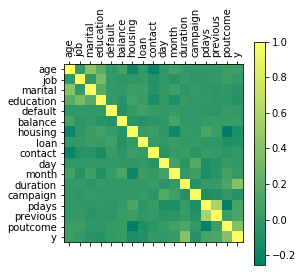

In [42]:
#tampilkan dengan heatmap
plt.matshow(new_df.corr(), cmap="summer")
plt.colorbar()

plt.xticks(list(range(len(new_df.columns))), new_df.columns, rotation="vertical")
plt.yticks(list(range(len(new_df.columns))), new_df.columns, rotation="horizontal")

plt.show()

In [43]:
#mencari korelasi terbaik untuk variabel y
new_df.corr()["y"].sort_values(ascending=False)

y            1.000000
duration     0.401118
poutcome     0.396350
previous     0.116714
pdays        0.104087
age          0.045092
month        0.023335
balance      0.017905
job          0.005100
default      0.001303
contact     -0.002108
day         -0.011244
marital     -0.045815
education   -0.055368
campaign    -0.061147
loan        -0.070517
housing     -0.104683
Name: y, dtype: float64

([<matplotlib.axis.XTick at 0x1682d04dfd0>,
 <a list of 17 Text xticklabel objects>)

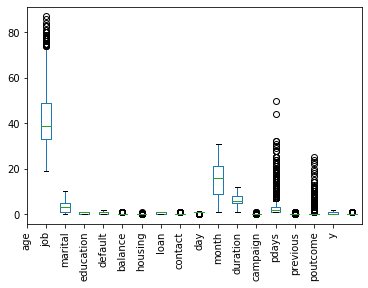

In [44]:
new_df.plot.box()
plt.xticks(list(range(len(new_df.columns))), new_df.columns, rotation='vertical')

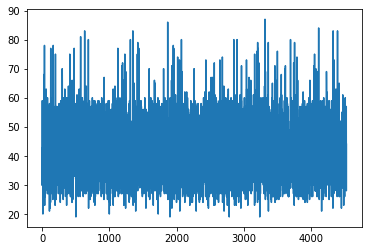

In [45]:
plt.plot(df.age.values)

(array([ 111.,  944., 1235.,  869.,  612.,  576.,  100.,   36.,   30.,
           8.]),
 array([19. , 25.8, 32.6, 39.4, 46.2, 53. , 59.8, 66.6, 73.4, 80.2, 87. ]),
 <a list of 10 Patch objects>)

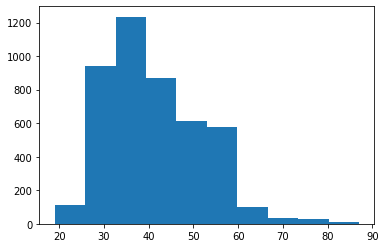

In [46]:
plt.hist(df.age.values)

C:\Users\hafizmrf3\Anaconda3\envs\envTF2\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  


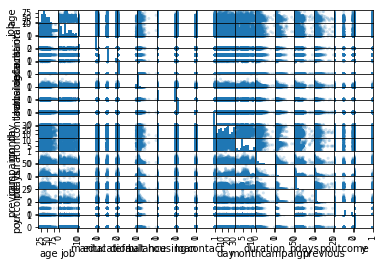

In [47]:
axes = pd.plotting.scatter_matrix(new_df, alpha=0.2)
plt.tight_layout()
plt.show()

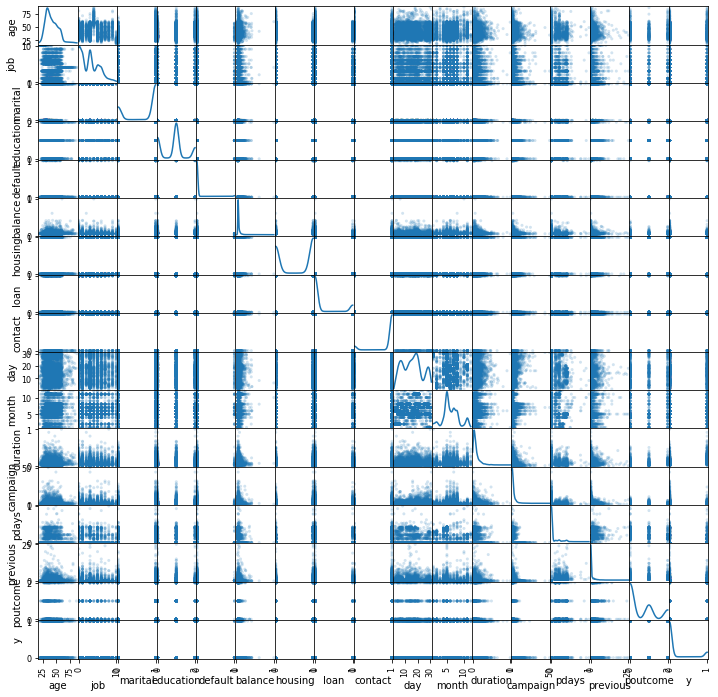

In [48]:
pd.plotting.scatter_matrix(new_df, alpha=0.2, figsize=(12,12), diagonal='kde')
plt.show()

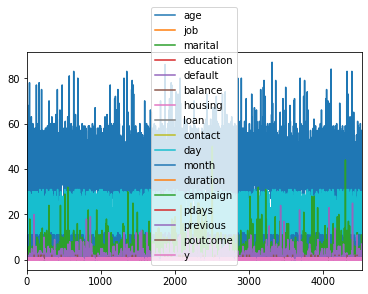

In [49]:
new_df.plot()

In [50]:
low = 0.01
high = 0.99
new_df.quantile([low,high])

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0.01,24.0,0.0,0.0,0.0,0.0,0.035457,0.0,0.0,0.0,2.0,1.0,0.002052,1.0,0.000000,0.0,0.0,0.0
0.99,72.0,10.0,1.0,2.0,1.0,0.234998,1.0,1.0,1.0,31.0,11.0,0.415425,16.0,0.425459,8.0,2.0,1.0


In [51]:
qdf = new_df.quantile([low,high])

In [52]:
qdf.age

0.01    24.0
0.99    72.0
Name: age, dtype: float64

In [53]:
qdf.age[low]

24.0

In [54]:
new_df.age = new_df.age.apply(lambda v: v if qdf.age[low] < v < qdf.age[high] else np.nan)

In [55]:
new_df.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,4406.000000,4483.000000,4521.000000,4334.000000,4521.000000,4521.000000,4521.000000,4521.000000,3197.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,816.000000,4521.000000
mean,41.057876,3.102164,0.735457,0.844947,0.016810,0.063565,0.566025,0.152842,0.905849,15.915284,6.166777,0.086051,2.793630,0.046751,0.542579,0.557598,0.115240
std,9.751862,2.675571,0.441138,0.666325,0.128575,0.040397,0.495676,0.359875,0.292084,8.247667,2.378380,0.086017,3.109807,0.114818,1.693562,0.750699,0.319347
min,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,1.000000,0.000000,0.000000,0.000000,0.045395,0.000000,0.000000,1.000000,9.000000,5.000000,0.033102,1.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,3.000000,1.000000,1.000000,0.000000,0.050429,1.000000,0.000000,1.000000,16.000000,6.000000,0.059914,2.000000,0.000000,0.000000,0.000000,0.000000
75%,48.000000,5.000000,1.000000,1.000000,0.000000,0.064335,1.000000,0.000000,1.000000,21.000000,8.000000,0.107580,3.000000,0.000000,0.000000,1.000000,0.000000
max,71.000000,10.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,31.000000,12.000000,1.000000,50.000000,1.000000,25.000000,2.000000,1.000000


In [56]:
nan_rows = new_df[new_df['age'].isnull()]
print("Data NULL pada atribut age : " + str(nan_rows.shape[0]))

Data NULL pada atribut age : 115


In [57]:
new_df.age.dropna(inplace=True)

In [58]:
new_df.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,4406.000000,4483.000000,4521.000000,4334.000000,4521.000000,4521.000000,4521.000000,4521.000000,3197.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,816.000000,4521.000000
mean,41.057876,3.102164,0.735457,0.844947,0.016810,0.063565,0.566025,0.152842,0.905849,15.915284,6.166777,0.086051,2.793630,0.046751,0.542579,0.557598,0.115240
std,9.751862,2.675571,0.441138,0.666325,0.128575,0.040397,0.495676,0.359875,0.292084,8.247667,2.378380,0.086017,3.109807,0.114818,1.693562,0.750699,0.319347
min,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,1.000000,0.000000,0.000000,0.000000,0.045395,0.000000,0.000000,1.000000,9.000000,5.000000,0.033102,1.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,3.000000,1.000000,1.000000,0.000000,0.050429,1.000000,0.000000,1.000000,16.000000,6.000000,0.059914,2.000000,0.000000,0.000000,0.000000,0.000000
75%,48.000000,5.000000,1.000000,1.000000,0.000000,0.064335,1.000000,0.000000,1.000000,21.000000,8.000000,0.107580,3.000000,0.000000,0.000000,1.000000,0.000000
max,71.000000,10.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,31.000000,12.000000,1.000000,50.000000,1.000000,25.000000,2.000000,1.000000


In [59]:
new_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30.0,8.0,1,2.0,0,0.068455,0,0,1.0,19,10,0.024826,1,0.000000,0,NaN,0
1,33.0,6.0,1,1.0,0,0.108750,1,1,1.0,11,5,0.071500,1,0.389908,4,0.0,0
2,35.0,0.0,0,0.0,0,0.062590,1,0,1.0,16,4,0.059914,1,0.379587,1,0.0,0
3,30.0,0.0,1,0.0,0,0.064281,1,1,NaN,3,6,0.064548,4,0.000000,0,NaN,0
4,59.0,3.0,1,1.0,0,0.044469,1,0,NaN,5,5,0.073486,1,0.000000,0,NaN,0


In [60]:
new_df.age.unique()

array([30., 33., 35., 59., 36., 39., 41., 43., 31., 40., 56., 37., 25.,
       38., 42., 44., 26., 55., 67., 53., 68., 32., 49., 52., 34., 61.,
       45., 48., 57., 54., 63., 51., 29., 50., 27., 60., 28., 58., 46.,
       47., 70., 65., 64., 62., 66., 71., 69.])

{'whiskers': [<matplotlib.lines.Line2D at 0x1683fd48c50>,
 'caps': [<matplotlib.lines.Line2D at 0x1683fd48f28>,
 'boxes': [<matplotlib.lines.Line2D at 0x1683fd48828>],
 'medians': [<matplotlib.lines.Line2D at 0x1683fd3a9b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1683fd3acf8>],
 'means': []}

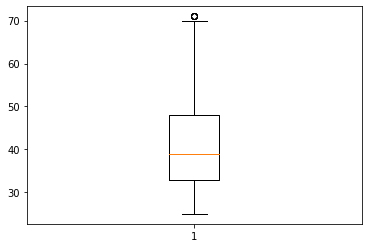

In [61]:
plt.boxplot(new_df.age)

In [65]:
new_df.to_csv("preprocessed.csv", index=False)

In [66]:
new_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30.0,8.0,1,2.0,0,0.068455,0,0,1.0,19,10,0.024826,1,0.000000,0,NaN,0
1,33.0,6.0,1,1.0,0,0.108750,1,1,1.0,11,5,0.071500,1,0.389908,4,0.0,0
2,35.0,0.0,0,0.0,0,0.062590,1,0,1.0,16,4,0.059914,1,0.379587,1,0.0,0
3,30.0,0.0,1,0.0,0,0.064281,1,1,NaN,3,6,0.064548,4,0.000000,0,NaN,0
4,59.0,3.0,1,1.0,0,0.044469,1,0,NaN,5,5,0.073486,1,0.000000,0,NaN,0
5,35.0,0.0,0,0.0,0,0.054496,0,0,1.0,23,2,0.045349,2,0.202982,3,0.0,0
6,36.0,7.0,1,0.0,0,0.048590,1,0,1.0,14,5,0.111552,1,0.379587,2,1.0,0
7,39.0,1.0,1,1.0,0,0.046442,1,0,1.0,6,5,0.048659,2,0.000000,0,NaN,0
8,41.0,2.0,1,0.0,0,0.047436,1,0,NaN,14,5,0.017544,2,0.000000,0,NaN,0
9,43.0,6.0,1,2.0,0,0.043288,1,1,1.0,17,4,0.102284,1,0.169725,2,0.0,0


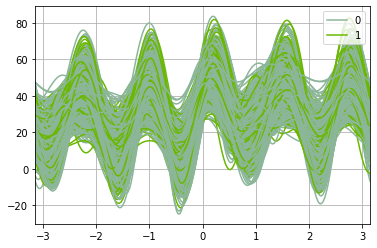

In [67]:
from pandas.plotting import andrews_curves
andrews_curves(new_df, 'y')
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000016838C34F28>,
      dtype=object)

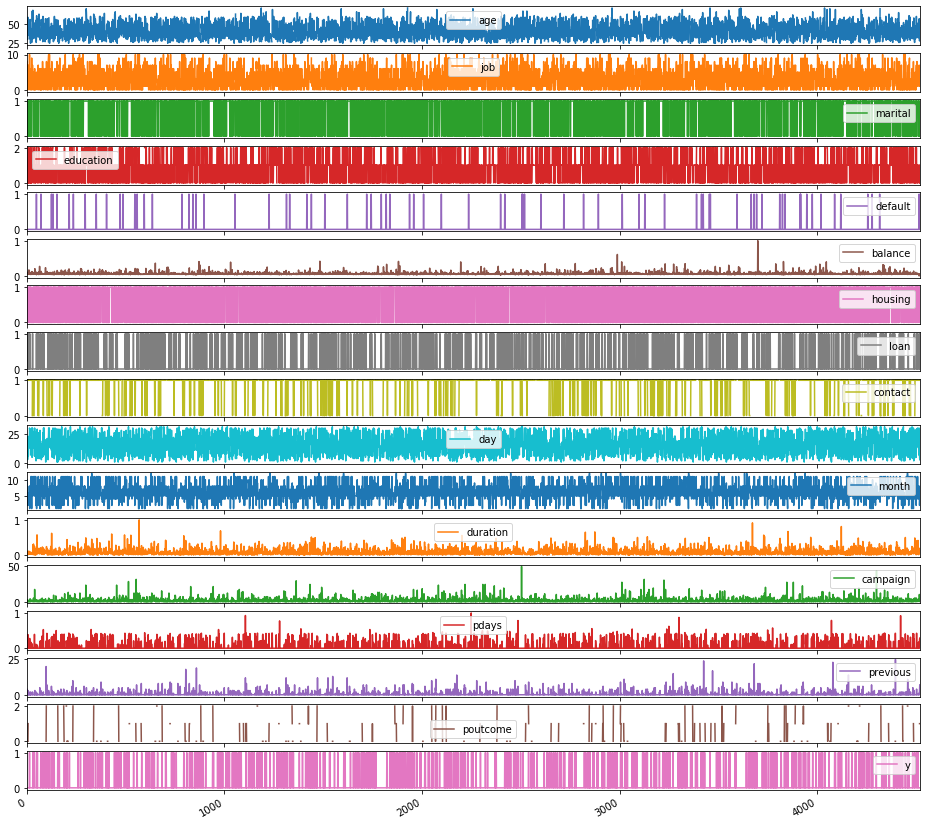

In [69]:
new_df.plot(subplots=True, figsize=(16,16))

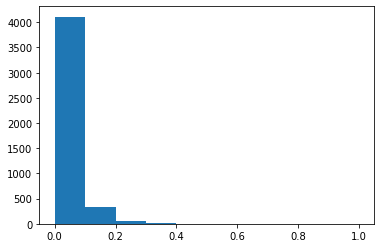

In [70]:
plt.hist(new_df.balance.values)
plt.show()

In [71]:
new_df.y.unique()

array([0, 1], dtype=int64)

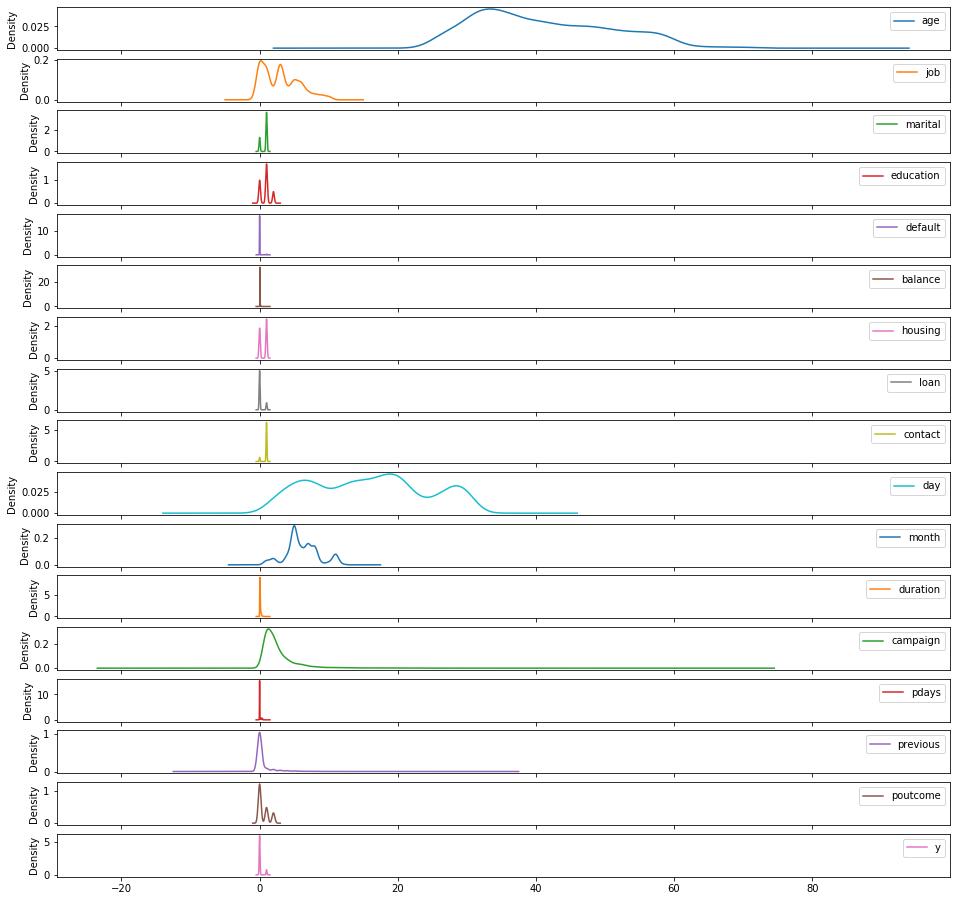

In [72]:
new_df.plot.kde(subplots=True, figsize=(16,16))
plt.show()

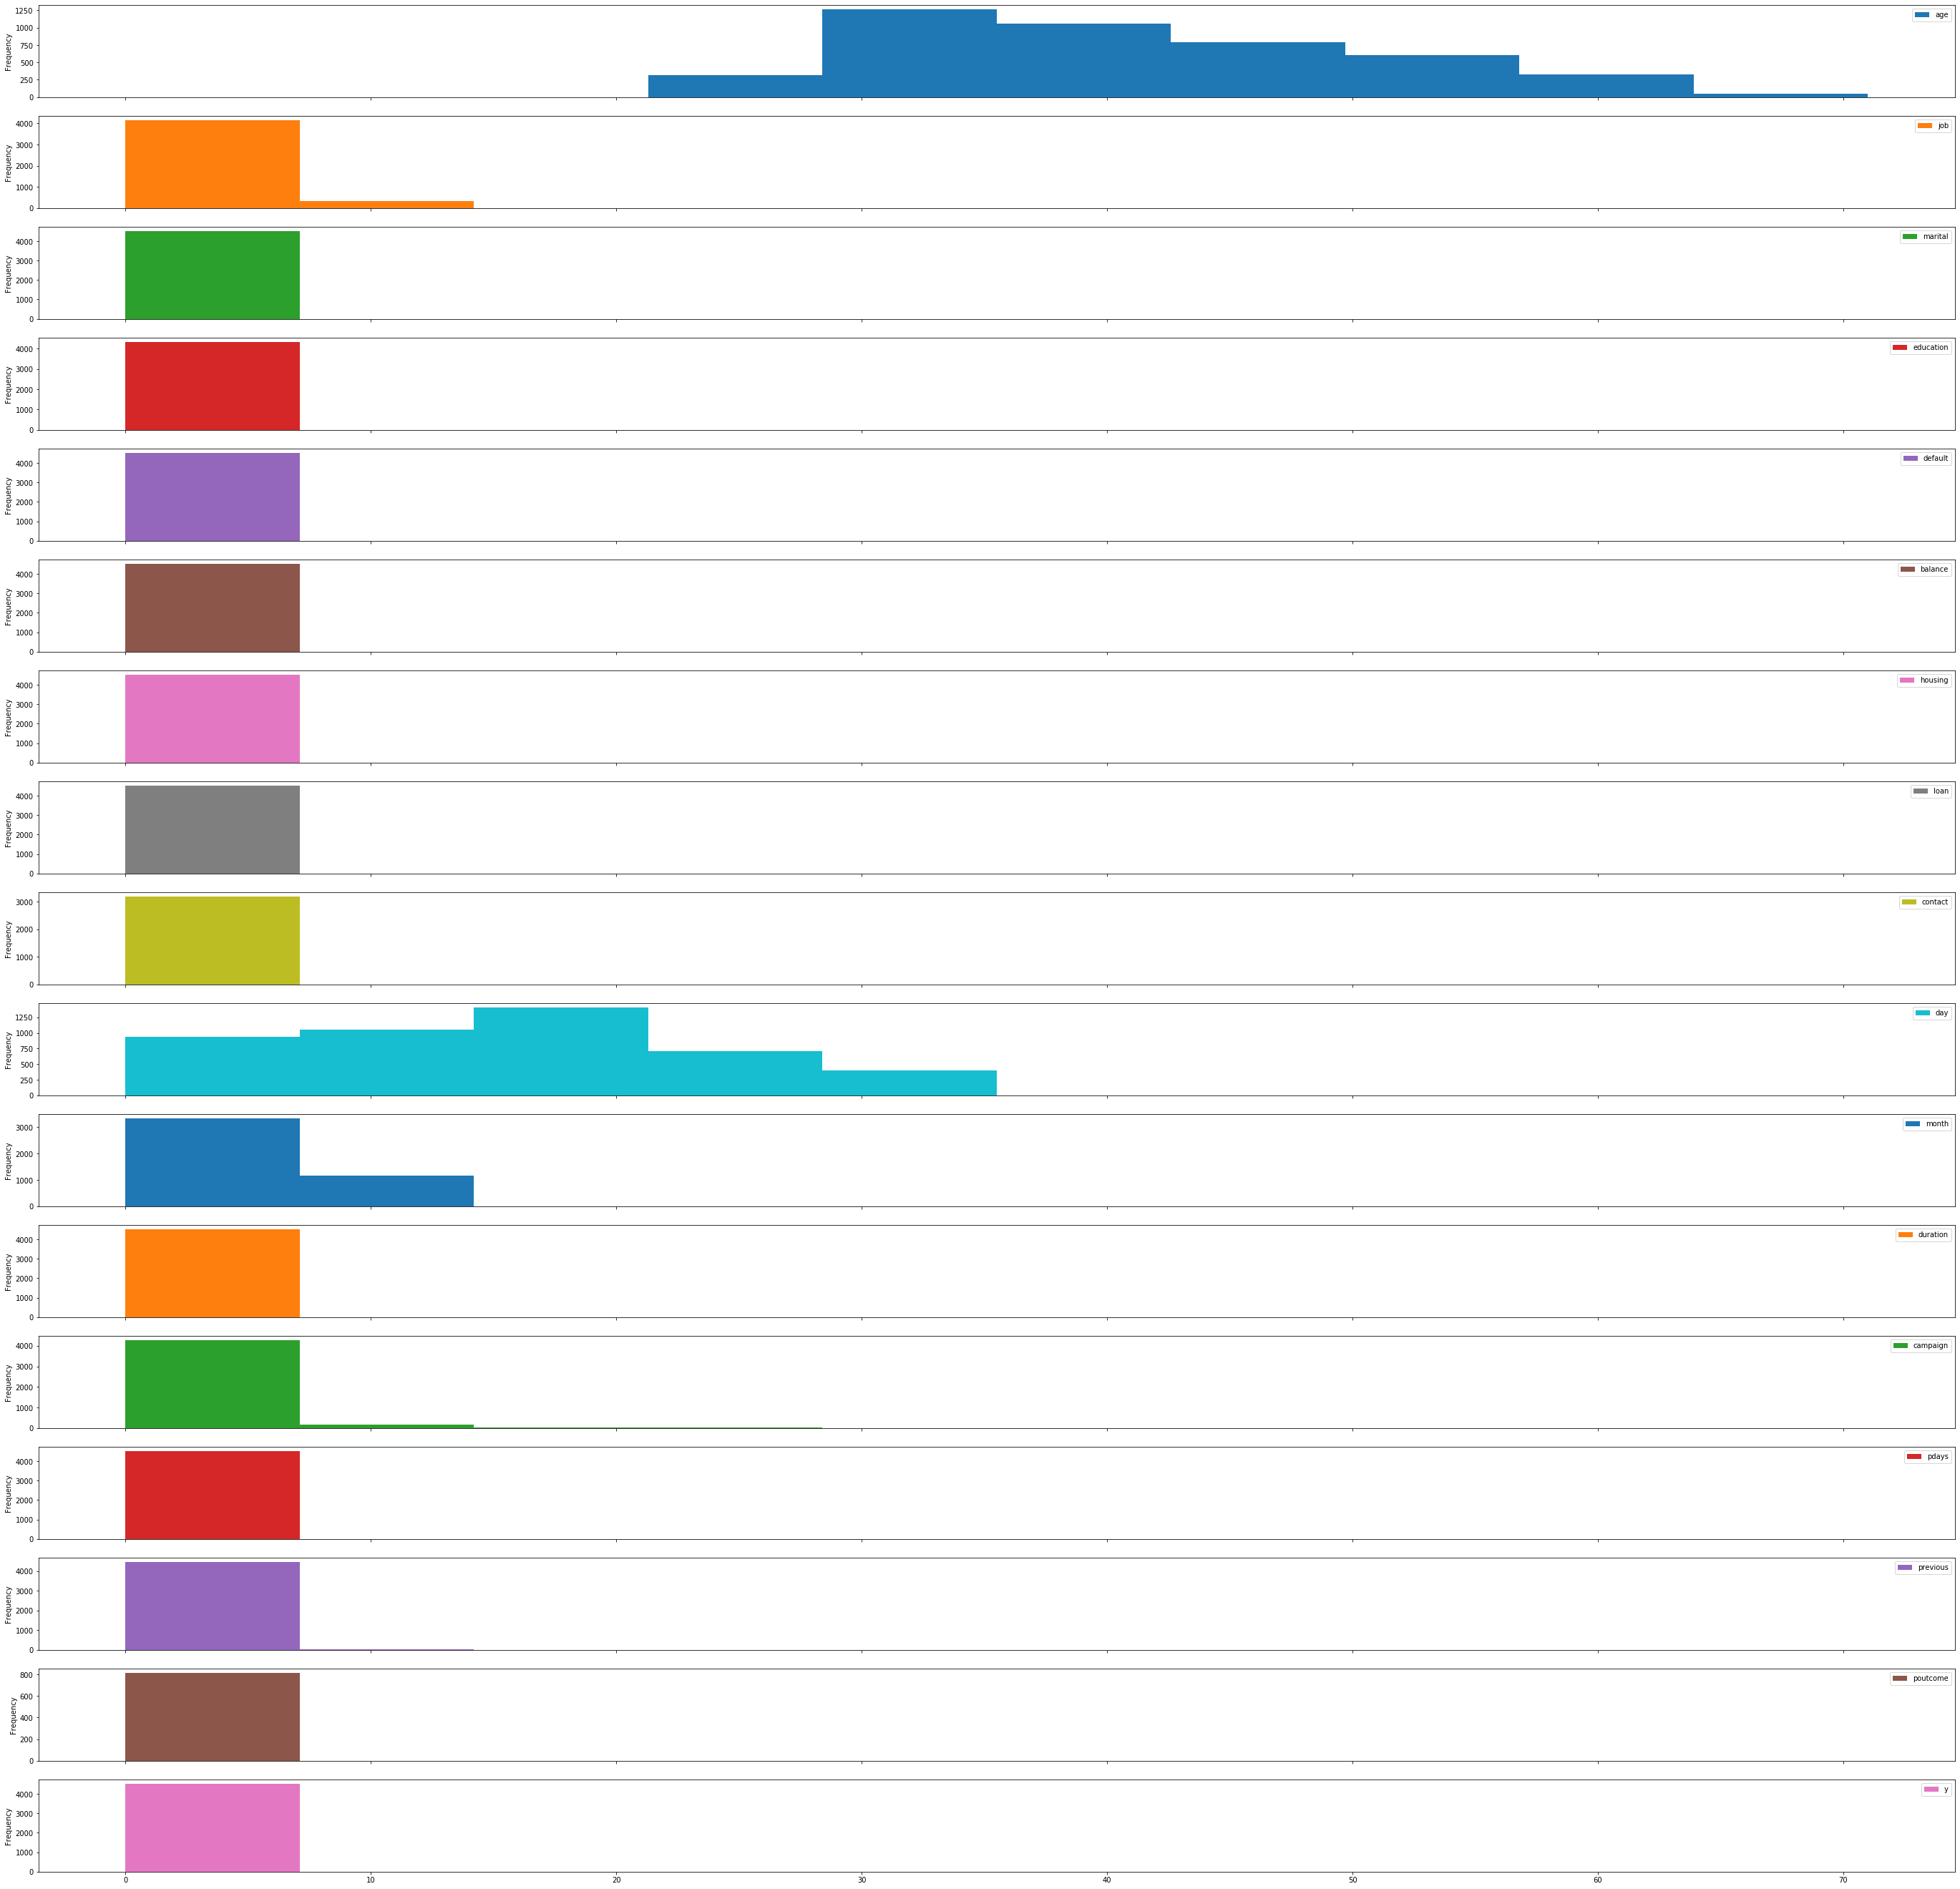

In [74]:
new_df.plot.hist(subplots=True, figsize=(48,48))
plt.show()